In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + np.random.randn(200,1)


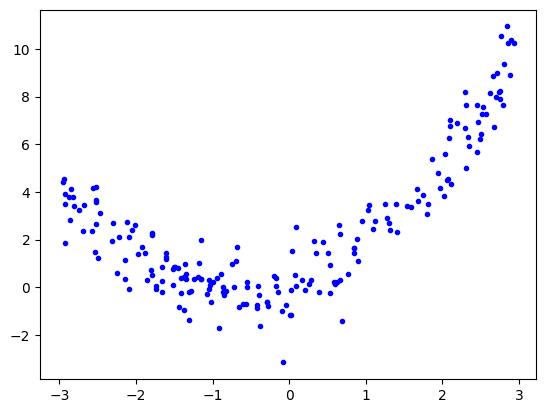

In [3]:
plt.plot(X,y,'b.')

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
ypred = lr.predict(X_test)
r2_score(y_test,ypred)

0.4180175329499156

# Result before applying Polynomial Regression

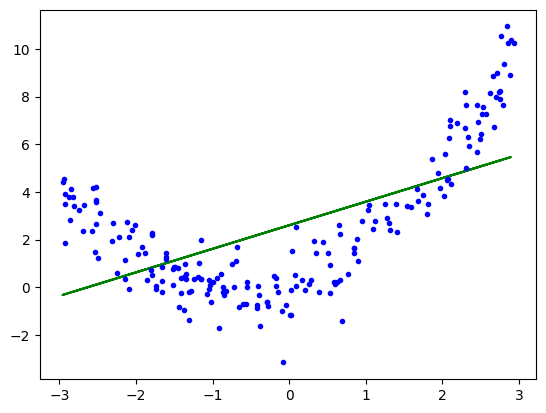

In [8]:
plt.plot(X_train,lr.predict(X_train),color='g')
plt.plot(X,y,'b.')

# Result after applying Polynomial Regression

In [9]:
# applying polynomial regression with degree 2
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
print(X_train[0])
print(X_train_trans[0])

[-2.81575978]
[ 1.         -2.81575978  7.92850316]


In [11]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [12]:
ypred = lr.predict(X_test_trans)
r2_score(y_test,ypred)

0.9086705724126464

In [13]:
print(lr.coef_)

[[0.         0.93770119 0.77698563]]


In [14]:
lr.intercept_

array([0.10082111])

In [15]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

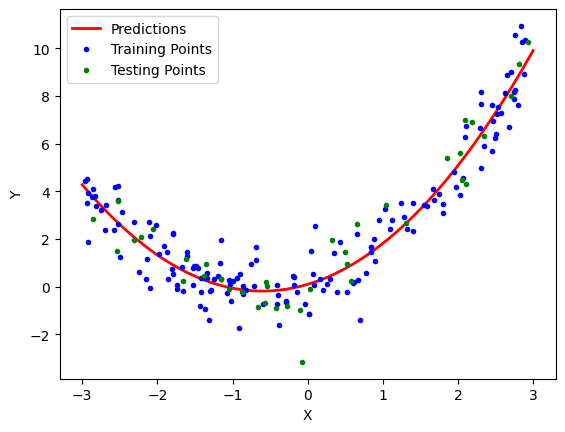

In [16]:
plt.plot(X_new,y_new,'r-',linewidth=2,label='Predictions')
plt.plot(X_train,y_train,'b.',label='Training Points')
plt.plot(X_test,y_test,'g.',label='Testing Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Multiple Polynomial Regression

In [17]:
x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)

In [18]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [19]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [20]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [21]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [22]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [23]:

print("Powers\n",poly.powers_)

Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [11  3]
 [10  4]
 [

In [24]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [25]:
X_test_multi = poly.transform(final)


In [26]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [27]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()